<a href="https://colab.research.google.com/github/sritejamantha/Tutorial_AntiscalantPolyelectrolytes/blob/main/Dow_Jan16_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Molecular Modeling of Antiscalant Polyelectrolytes: Dow-Caltech UPI**

##<p align="center"><b>Colab Notebook Credits</b></p>

<font color="blue">**Caltech Team:**</font>
> Dr. Sriteja Mantha

>Prof. Zhen-Gang Wang research group

>Chemistry and Chemical Engineering Division

>Caltech
        
<font color="blue">**Event:**</font>  
>Tutorial session on the molecular models developed as part of Dow-Caltech UPI on Antiscalant Polyelectrolytes

<font color="blue">**Venue:**</font>
>Dow-Terneuzen

<font color="blue">**Date:**</font>   
>January-16, 2024






##<b>Tutorial Objective:</b>
>To introduce 'molecular modeling work flow' for investigating the antiscalant activity of model polyelectrolytes

##<b>Anticipated Outcomes:</b>
>Upon working through this tutorial, you will acquire general understanding on

>a) Building topology of an atactic polyelectrolyte chain for molecular simulation using GROMACS MD engine

>and

>b) Hamiltonian Replica Exchange MD simulations for estimating binding capacity and the mechanism of Ca<sup>2+ </sup> binding to model polyelectrolyte chain.

>The tutorial is divided into <font color="red"><b>two parts</b></font> in-line with the anticipated outcomes stated above.

> For the first part of this tutorial, we will work with this Google Colab Notebook. In the second part of this tutorial, we will switch to the computer cluster for any of GROMACS related functionalities


## **Forcefield for molecular modeling of Antiscalant Polyelectrolyte**

The force field for polyacrylic acid is based on parameters from [Mintis and Mavrantzas (2019)](https://doi.org/10.1021/acs.jpcb.9b01696), which used the General Amber Force Field (GAFF). We have converted the tables of parameters into a force field named [gaff.ff](https://drive.google.com/drive/folders/12ZCvHJaDrP6oOwP7bF27CVpifJnOovP0?usp=sharing) that can be used with Gromacs.

We use the same GAFF framework to build forcefield models for other polyelectrolyte variants, such as a poly(acrylate-co-vinyl alcohol) and poly(acrylate-co-vinyl acetate)

Small ion parameters, such as sodium, calcium, and chlorine, are taken from the Jungwirth group's ECCR model fittings.

>Sodium ion parameters are found in:

>Kohagen, Miriam, Philip E. Mason, and Pavel Jungwirth. "Accounting for electronic polarization effects in aqueous sodium chloride via molecular dynamics aided by neutron scattering." The Journal of Physical Chemistry B 120.8 (2016): 1454-1460. [DOI](https://doi.org/10.1021/acs.jpcb.5b05221)

>Calcium and chlorine ion parameters are found in:

>Martinek, Tomas, et al. "Calcium ions in aqueous solutions: Accurate force field description aided by ab initio molecular dynamics and neutron scattering." The Journal of chemical physics 148.22 (2018): 222813 [DOI](https://doi.org/10.1063/1.5006779)

Water is modeled using SPC/E, as it offers a good balance of physical performance and computational accuracy.

In the section below, we will construct the topology of a model polyelectroltye chain and source corresponding parameters for their molecular simulations using GROMACS MD engine



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import IPython.display as ipd

# **Part-1: Constructing the topology of a model polyelectrolyte chain**

For the purposes of this tutorial we will construct the molecular model for Poly-(acrylate-*co*-alcohol) copolymer that is suitable for molecular simulations using GROMACS MD Engine.

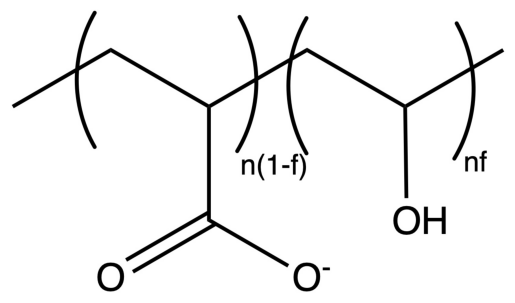

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the correct path to the image file
image_path = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/coAA-Alcohol.jpeg'

# Load the image using PIL
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

Constructing a molecular model for any macromolecule involves following steps:

>a) Generating the 3D spatial cordinates of atoms in the polyelectrolyte of interest

>b) Sourcing the bonded & non-bonded interaction parameters between different atom types that are consistent with the forcefield of interest

>> partial charges on atoms

>> bonded interactions (bond, angle, dihedral connectivity)

>> non-bonded interactions (size of atom & interaction strength)

##**Generating 3D spatial cordinates of atoms in the Poly-(acrylate-co-vinylalochol) copolymer**

>We will construct an 'atactic' polyelectrolyte with 32 monomers per chain. Every fourth monomer is of vinyl alcohol type and rest are acrylate.

>i.e., f<sub>VAC</sub>=0.25 : fraction of vinyl alcohol monomers on the polyelectrolyte chain

>Tacticity is build by randomly assigning stereochemistry to each of the monomers along the polymer backbone


> we will execute [run_copolymer.ipynb notebook](https://colab.research.google.com/drive/11jnfDTx0tE-Ds5t40rZN1UUVmCTgpC3y?usp=sharing) to generate copolymer of interest and render it using VMD.



##**Sourcing bonded and non-bonded interaction parameters between atom types that are consistent with the forcefield of interest**

> We will use the just generated PAcr-iiic_block-32mer-atactic-Hend.pdb file and gromacs built-in [pdb2gmx](https://manual.gromacs.org/current/onlinehelp/gmx-pdb2gmx.html) module to generate topol.top file.

>> topol.top defines all the necessary bonded and non-bonded interactions

>> We need a pre-constructed forcefield directory [gaff.ff](https://drive.google.com/drive/folders/12ZCvHJaDrP6oOwP7bF27CVpifJnOovP0?usp=sharing) to successfully launch [pdb2gmx](https://manual.gromacs.org/current/onlinehelp/gmx-pdb2gmx.html)

###**Generating topol.top**



Execute the following command to generate topol.top file
>```gmx_mpi pdb2gmx -f PAcr-iiic_block-32mer-atactic-Hend.pdb -p -i -o PAAcoPVAlf0.25n32mer.gro```

First few lines of the topol.top file will look as follows:

In [ ]:
# Reading and printing lines 25 to 50 of a file
filename = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/topol.top'

with open(filename, 'r') as file:
    for i, line in enumerate(file, start=1):  # Start counting lines from 1
        if 25 <= i <= 56:
            print(line.strip())


coPAl     3

[ atoms ]
;   nr       type  resnr residue  atom   cgnr     charge       mass  typeB    chargeB      massB
; residue   1 LAI rtp LAI  q -0.8
1         C3      1    LAI      C      1  -0.257492      12.01
2         HC      1    LAI    HC1      1  0.0288041      1.008
3         HC      1    LAI    HC2      1  0.0288041      1.008
4         HC      1    LAI    HC3      1  0.0288041      1.008
5         C3      1    LAI     CA      2   0.203935      12.01
6         HC      1    LAI    HA1      2 -0.0677186      1.008
7          C      1    LAI     CB      3   0.644044      12.01
8          O      1    LAI    OB1      3  -0.679591         16
9          O      1    LAI    OB2      3  -0.679591         16   ; qtot -0.75
; residue   2 ACI rtp ACI  q -0.8
10         C3      2    ACI      C      4 -0.0496971      12.01
11         HC      2    ACI    HC1      4 -0.0103644      1.008
12         HC      2    ACI    HC2      4 -0.0103644      1.008
13         C3      2    ACI     CA    

In the above file,
```
first column: Atom number

second column: Atom type

third column: Residue number

fourth column: Residue name

fifth column: Atom name

sixth column: Charge group number

seventh column: Partial charge

eight column: Atomic mass
```

Atom type, Residue name, & Partial charges are read into topol.top file from the gaff.ff/residues.rtp file

In [ ]:
# Reading and printing lines 3-21 and 386-444 of a file
filename = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/gaff.ff/residues.rtp'

with open(filename, 'r') as file:
    for i, line in enumerate(file, start=1):  # Start counting lines from 1
        if (3 <= i <= 27) or (44 <=i <= 117) or (386 <= i <= 444):
            print(line.strip())


[ bondedtypes ]
; Column 1 : default bondtype
; Column 2 : default angletype
; Column 3 : default proper dihedraltype
; Column 4 : default improper dihedraltype
; Column 5 : This controls the generation of dihedrals from the bonding.
;            All possible dihedrals are generated automatically. A value of
;            1 here means that all these are retained. A value of
;            0 here requires generated dihedrals be removed if
;                there are any dihedrals on the same central atoms
;                specified in the residue topology, or
;                there are other identical generated dihedrals
;                sharing the same central atoms, or
;                there are other generated dihedrals sharing the
;                same central bond that have fewer hydrogen atoms
; Column 6 : number of neighbors to exclude from non-bonded interactions
; Column 7 : 1 = generate 1,4 interactions between pairs of hydrogen atoms
;            0 = do not generate such
; Colum

We note three different types of acrylate ion (LAI, ACI,RAI)vinyl alochol residues. Namely: LAL,ALC,RAL

These are defined to account for the placement of vinylalochol or acrylate monomers along the polymer backbone.

For example, along a polymer backbone, a vinyl alcohol monomer can appear either as the left most monomer (LAL), or any where in the middle of the polymerbackbone (ALC) or as the right most monomer (RAL).

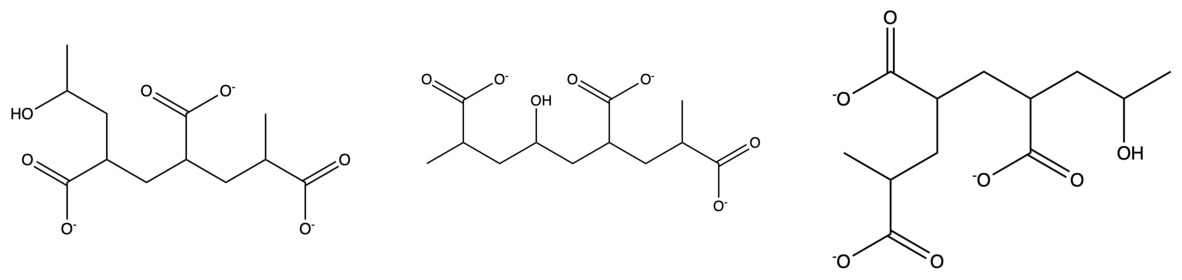

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the images
image_paths = [
    '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/4mer_VOH-Left.jpeg',
    '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/4mer_VOH-Middle.jpeg',
    '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/4mer_VOH-Right.jpeg'
]

# Set up the matplotlib figure and axes
plt.figure(figsize=(15, 5))  # Adjust the size as needed

# Loop through the image paths and display each image
for i, image_path in enumerate(image_paths):
    img = mpimg.imread(image_path)
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, index i+1
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers

plt.show()


Atomtypes of each of these different vinyl alcohol (LAL, ALC, RAL) residues are sourced from the Generalized Amber forcefield
> Discussion on this is given below

These three different residue types differ a bit in their partial charge assignment
> Construction of partial charges for each of these monomers is demonstrated below

###**[Optional] Constructing the partial charges that are consistent with the force field of interest**

> This section requires [Orca](https://orcaforum.kofo.mpg.de/app.php/portal) and [Multifwn](http://sobereva.com/multiwfn/) pacakages.

> [Orca](https://orcaforum.kofo.mpg.de/app.php/portal) is a quantum chemistry package. We use this package to compute electron density of a monomer (or an oligomer) at the HF/6-31G* level of Quantum theroy. However it requires a license fee for any non-academic usage.

> [Multifwn](http://sobereva.com/multiwfn/) is then used to calculate the RESP charges for each atom in the monomer unit.

>> The above quantum theory and RESP charge fitting are prescribed by [AMBER](https://ambermd.org/antechamber/gaff.html) developers to construct general purpose amber force field parameters for any macromolecule of interest

>We will skip Orca & Multiwfn calculations. However, I have uploaded necessary scripts to generate and postprocess them for our molecular simulations. Please look into the following notebook for the workflow [partial_charges.ipynb](https://colab.research.google.com/drive/1xjzkki9hSxJmE0ixOMSixX-17z-rzySU?usp=sharing)

>> The smallest oligomer that has all the three types of vinylalochol residues is a vinyl alcohol trimer. We first compute partial charges for all the atoms in a vinyl alcohol trimer and manually assign these charges to corresponding atoms in LAL,ALC and RAL residues in residues.rtp file in the gaff.ff folder.

>> During the postprocessing we apply a scaling factor of 0.75 to account for electronic polarization of ionic systems due to solvent in the molecular dynamics simulations.



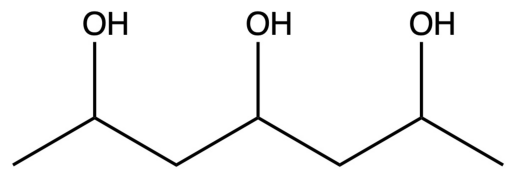

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
# Specify the correct path to the image file
image_path = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/3mer_VOH.jpeg'

# Load the image
# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

###**Sourcing atomtypes and corresponding force-field parameters consistent with the generalized amber forcefield framework**

> We will use Amber Antechamber and ACPYPE tools in the [forcefield.ipynb notebook](https://colab.research.google.com/drive/1faiWBQqE8H2LVxlmjRfIJSZtEPjpH9ok?usp=sharing) to construct the topologies.

>>Similar to the partial charge calculation, we run vinyl alcohol trimer with the Antechamber and ACPYPE tools to obtain atomtypes and corresponding interaction parameters

###**Preparing a molecular simulation box containing single polyelectrolyte chain solvated in a water box**

End to end distance of a 32-mer polyelectrolyte chain in an extended conformation is about 5nm. To avoid direct interactions of a single polyelectrolyte chain with its image in a simulation box, we will choose dimensions of our simulation box to be:

>12x12x12nm<sup>3</sup>


We will place the polymer at the center of a simulation box:
```
gmx_mpi editconf -f PAAcoPVAlf0.25n32mer.gro -c -box 12 12 12 -o PAAcoPVAlf0.25n32mer.gro
```

Then add solvent to the box:
```
gmx_mpi solvate -cp ../PAAcoPVAlf0.25n32mer.gro -p ../topol.top -o PAAcoPVAlf0.25n32merSolv.gro
```

Locally minimize the energy of the system to remove any bad contacts (or overlaps) between different atoms in the solvated system
```
gmx_mpi grompp -f ../../MDP/minim.mdp -p ../topol.top -c  PAAcoPVAlf0.25n32merSolv.gro -o PAAcoPVAlf0.25n32merSolvMinim.tpr

gmx_mpi mdrun -v -deffnm PAAcoPVAlf0.25n32merSolvMinim
```

Add Ions to neutralize charge on the polymer backbone and locally minimize the energy of the system.

```
gmx_mpi grompp -f ../../MDP/minim.mdp -p ../../InitFiles/topol.top -c ../Solvate/PAAcoPVAlf0.25n32merSolvMinim.gro -o Ions.tpr

gmx_mpi genion -np 24 -pname NA -s Ions.tpr -p ../../InitFiles/topol.top -o NaPAAcoPVAlf0.25n32mer.gro

gmx_mpi grompp -f ../../MDP/minim.mdp -p ../../InitFiles/topol.top -c NaPAAcoPVAlf0.25n32mer.gro -o NaPAAcoPVAlf0.25n32merMinim.tpr

gmx_mpi mdrun -v -deffnm NaPAAcoPVAlf0.25n32merMinim
```

To the above prepared poly(acrylate-co-alchol) in a water box, we will add 32Ca<sup>2+</sup> and 64 Cl<sup>-</sup> ions
```
gmx_mpi grompp -f ../../MDP/minim.mdp -p topol.top -c NaPAAcoPVAlf0.25n32merMinim.gro -o Ions.tpr

gmx_mpi genion -np 32 -pname CA -nn 64 -nname CL -p topol.top -s Ions.tpr -o NaPAAcoPVAlf0.25n32merIn32CaCl2.gro
```
create an index file
```
gmx_mpi make_ndx -f NaPAAcoPVAlf0.25n32merIn32CaCl2.gro
```

Equilibrate the system with v-rescale thermostat and Berendsen barostat.

```
gmx_mpi grompp -f ../../MDP/nptEqBr.mdp -c ../InitFiles/NaPAAcoPVAlf0.25n32merIn32CaCl2.gro -p ../InitFiles/topol.top -n ../InitFiles/index.ndx -o PAAcoPVAlf0.25n32merNptEqBrIn32CaCl2.tpr -maxwarn 1

gmx_mpi mdrun -v -deffnm PAAcoPVAlf0.25n32merNptEqBrIn32CaCl2
```
>Note:
>>This choice of thermostat and barostat is only for a quick relaxation of system to correct temperature and pressure conditions.

>>For equilibration, we use Nose-Hoover thermostat and Parrinello-Rahman Barostat

Equilibrate the system with Nose-Hoover thermostat and Parrinello-Rahman Barostat

```
gmx_mpi grompp -f ../../MDP/nptEq.mdp -c ../NptEqBr/NaPAAcoPVAlf0.25n32merNptEqBrIn32CaCl2.gro -p ../InitFiles/topol.top -n ../InitFiles/index.ndx -o PAAcoPVAlf0.25n32merNptEqIn32CaCl2.tpr -maxwarn 1

gmx_mpi mdrun -v -deffnm PAAcoPVAlf0.25n32merNptEqIn32CaCl2
```

At this stage we could proceed with regular MD simulations. However, Carboxylate-Ca ion pair is very strong and has a long relaxation of 50-100ns. This leads to insufficient sampling of polyelectrolyte in an aqueous CaCl<sub>2</sub> solution.

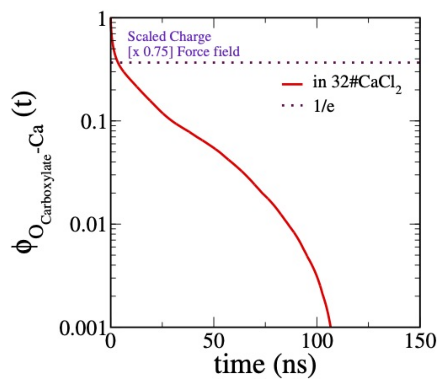

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the correct path to the image file
image_path = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/IPRlx_O2CMCaSclChrgIn32Ca.jpg'

# Load the image using PIL
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

#**Part2: Hamiltonian Replica Exchange MD Simulations of single polyelectrolyte chain in an aqueous CaCl<sub>2</sub> solution**

##HREMD Methodology

Please refer to the following articles for a detailed discussion on the relevant theory and methodology

>S.Mantha et al, Adsorption isotherm and mechanism of Ca<sup>2+</sup> binding to polyelectrolyte, *arXiv preprint* arXiv:2311.11404 [DOI:](https://doi.org/10.48550/arXiv.2311.11404)

>L. Wang et al, Replica Exchange with Solute Scaling: A More Efficient Version of Replica Exchange with Solute, Temper- ing (REST2),*The Journal of Physical Chemistry B* 2011, **115**, 9431–9438, [DOI:](https://doi.org/10.1021/jp204407d)

>G. Bussi, Hamiltonian replica exchange in GROMACS: a flexible implementation, *Molecular Physics*, 2013, **112**, 379–384, [DOI:](https://doi.org/10.1080/00268976.2013.824126)

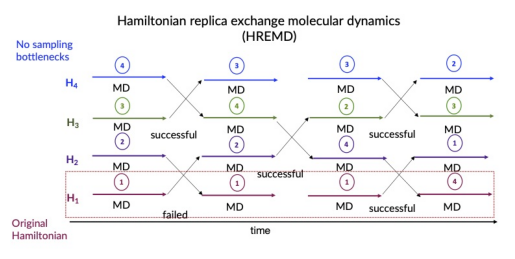

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
# Specify the correct path to the image file
image_path = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/HREMD_Fig.jpg'

# Load the image
# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

**Note:**
>1) We only attempt exchanges for neighboring Hamiltonians as the probability decreases very rapidly with the difference in Hamiltonian.

>2) We do not attempt exchanges for all possible pairs in one step.
>> If, for instance, replicas 1 and 2 would exchange, the chance of exchange for replicas 2 and 3 not only depends on the energies of replicas 2 and 3, but also on the energy of replica 1.

>In [GROMACS](https://manual.gromacs.org/current/reference-manual/algorithms/replica-exchange.html) this is solved by attempting exchange for all odd pairs on odd attempts and for all even pairs on even attempts.

We follow the same HREMD protocol reported by Bussi et.al. In this approach the system is split into two regions, $\text{hot}$ and $\text{cold}$, so that each atom is statically assigned to either the $\text{hot}$ or the $\text{cold}$ region, and define a parametrized Hamiltonian which depends on $\lambda$ as follows:

- The charge of atoms in the $\text{hot}$ region is scaled by a factor $\lambda$.
- The $\varepsilon$ (Lennard-Jones parameter) of atoms in the $\text{hot}$ region is scaled by a factor $\lambda$.
- The proper dihedral potentials for which the first and fourth atoms are in the $\text{hot}$ region are scaled by a factor $\lambda$.
- The proper dihedral potentials for which either the first or the fourth atom is in the $\text{hot}$ region are scaled by a factor $\lambda$.

The scaling parameter $\lambda$ can be chosen to be any real number between 1, for the reference, unmodified system, and 0.
>> Geometric or exponential spacing often works better than linear spacing

##**System preparation**

###**Generate different replicas**


To generate replicas for HREMD simulations, we need to first define atoms whose interactions we are biasing. In our current work we bias polymer and we do this in the following script.
```
python3 prep.py
```

Build topology files for different replicas:
>Deciding on number of replicas depends on several factors:
>> Range of Hamiltonian scaling ($\lambda$)

>> System size and complexity (scale usually as $\sqrt{f_p}$, where $f_p$ is the number of degrees of freedom we are biasing) [L. Wang et al](https://doi.org/10.1021/jp204407d)

>> Exchange probability: Should be neither too low nor too high. A common target is to have an exchange probability of about 20-30%.
```
./GenTop.sh
```

###Equilibrate the replicas at different Hamiltonian conditions
>We will generate the necessary input files by executing the following command
```
./runEq.sh
```
>We will launch the equilibrations using the following submit script (exact command may vary depending on the scheduler)
```
sbatch submitEq.sh
```
>Note: At this stage we are only equilibrating the system and not exchanging replicas using Metropolis criterion

###HREMD Production Runs
> We will generate the necessary input files by executing the following command
```
./runPr.sh
```
>We will launch the HREMD Production runs using the following submit script (exact command may vary depending on the scheduler)
```
sbatch submitPr.sh
```

The gromacs/plumed command to launch HREMD simulations look like this:
```
###### HREMD -- Begin Production ################
$MPI/mpiexec  -np "${N_REPLICA}" --map-by "ppr:${SIM_PER_NODE}:node:PE=${THREADS_PER_SIM}" \
        --use-hwthread-cpus --bind-to 'hwthread' --report-bindings \
    $GMX/gmx_mpi mdrun -v \
    -ntomp  "${THREADS_PER_SIM}" \
    -multidir Scale00 Scale01 Scale02 Scale03 Scale04 Scale05 Scale06 Scale07 Scale08 Scale09 Scale10 Scale11 Scale12 Scale13 Scale14 Scale15 Scale16 Scale17 Scale18 Scale19 Scale20 Scale21 Scale22 Scale23   -cpi -plumed plumed.dat -replex 500 -hrex

sleep 10

```

>Here, ```-replex``` and ```-hrex``` flags intruct mdrun to conduct HREMD and check for exchanges every 500 steps !

## Analysis of Replica Exchange Trajectory

###Exchange probabilities

In [ ]:
# Reading and printing lines 3-21 and 386-444 of a file
filename = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/md.log'

with open(filename, 'r') as file:
    for i, line in enumerate(file, start=1):  # Start counting lines from 1
        if (1578529 <= i <= 1578537 or 1578589 <=i <= 1578599):
            print(line.strip())

Replica exchange at step 124999000 time 249998.00000
Repl ex  0    1 x  2    3 x  4    5    6    7    8    9 x 10   11   12   13   14   15 x 16   17 x 18   19   20   21 x 22   23
Repl pr        1.0       .27       .01       .00       .45       .13       .00       1.0       1.0       .09       1.0

Replica exchange at step 124999500 time 249999.00000
Repl 0 <-> 1  dE_term = -0.000e+00 (kT)
dplumed =  6.214e+00  dE_Term =  6.214e+00 (kT)
Repl ex  0    1    2 x  3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20 x 21   22 x 23
Repl pr   .00       .82       .45       .04       .11       .05       .05       .01       .07       .20       1.0       .37
Replica exchange statistics
Repl  249999 attempts, 125000 odd, 124999 even
Repl  average probabilities:
Repl     0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23
Repl      .29  .29  .30  .30  .31  .32  .32  .32  .33  .33  .33  .34  .34  .34  

###Polymer End-End distance and Radius of gyration

```
gmx_mpi polystat -f Trj_PAAcoPVal_In32CaCl2_NoSolvent.xtc -s topolTrunc.tpr -o PolystatPAAcoPVAl_In32CaCl2.xvg
```

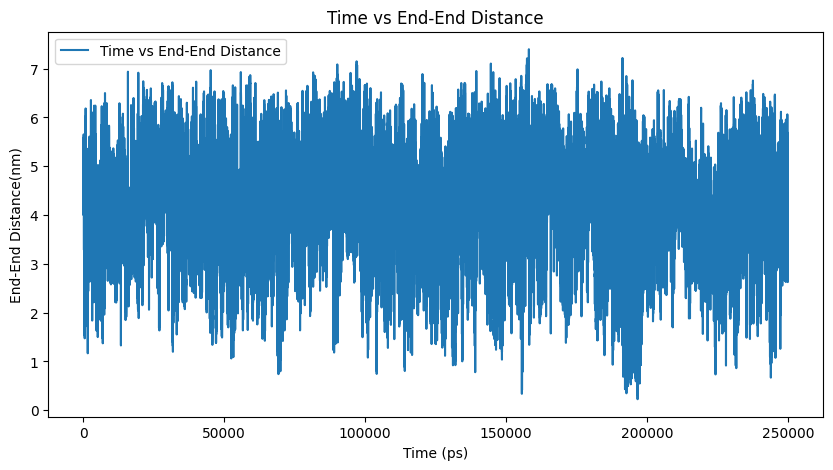

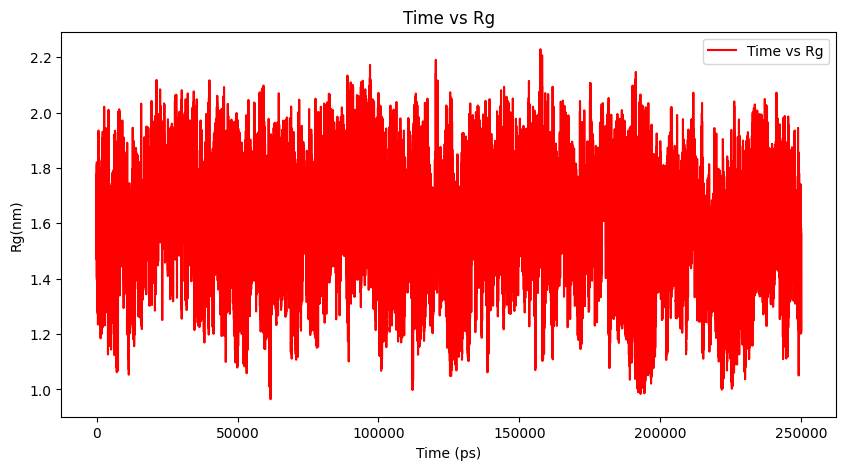

Mean of Column 2: 4.162031118755249, Standard Deviation of Column 2: 1.2285466395640667
Mean of Column 3: 1.589745426182953, Standard Deviation of Column 3: 0.22265026455490033


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Replace with the correct file path
filename = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/PolystatPAAcoPVAl_In32CaCl2.xvg'

# Reading the data, skipping lines that start with '#' and '@'
data = np.loadtxt(filename, comments=['#', '@'])

# Extracting columns
time = data[:, 0]  # Column 1
col2 = data[:, 1]  # Column 2
col3 = data[:, 2]  # Column 3

# Plotting Column 1 vs Column 2
plt.figure(figsize=(10, 5))
#plt.scatter(time, col2, label='Time vs End-End Distance')
plt.plot(time, col2, label='Time vs End-End Distance')
plt.xlabel('Time (ps)')
plt.ylabel('End-End Distance(nm)')
plt.title('Time vs End-End Distance')
plt.legend()
plt.show()

# Plotting Column 1 vs Column 3
plt.figure(figsize=(10, 5))
#plt.scatter(time, col3, color='red', label='Time vs Rg')
plt.plot(time, col3, color='red', label='Time vs Rg')
plt.xlabel('Time (ps)')
plt.ylabel('Rg(nm)')
plt.title('Time vs Rg')
plt.legend()
plt.show()

# Calculating mean and standard deviation
mean_col2 = np.mean(col2)
std_dev_col2 = np.std(col2)
mean_col3 = np.mean(col3)
std_dev_col3 = np.std(col3)

print(f"Mean of Column 2: {mean_col2}, Standard Deviation of Column 2: {std_dev_col2}")
print(f"Mean of Column 3: {mean_col3}, Standard Deviation of Column 3: {std_dev_col3}")


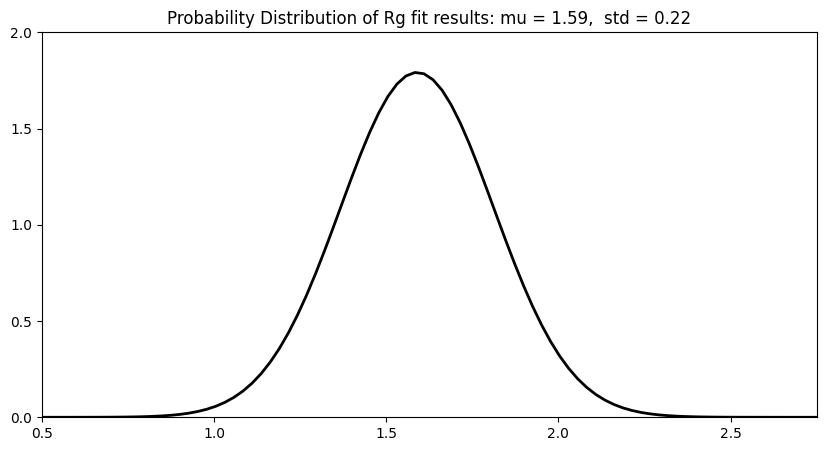

In [ ]:
# Probability Distribution for Column 2 and Column 3
def plot_probability_distribution(column, title, x_range=None, y_range=None, x_ticks=None, y_ticks=None):
    plt.figure(figsize=(10, 5))
    mu, std = norm.fit(column)
    #plt.hist(column, bins=25, density=True, alpha=0.6, color='g', linewidth=2, edgecolor='black', fill=False)
    # Determine the range of x values for the plot
    x_min = min(column) - 3 * std
    x_max = max(column) + 3 * std
    x = np.linspace(x_min, x_max, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Adjust the x and y-axis ranges if provided
    if x_range is not None:
        plt.xlim(x_range)
    if y_range is not None:
        plt.ylim(y_range)

    # Adjust the x and y-axis ticks if provided
    if x_ticks is not None:
        plt.xticks(x_ticks)
    if y_ticks is not None:
        plt.yticks(y_ticks)


    title = title + " fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

#plot_probability_distribution(col2, 'Probability Distribution of End-End Distance')
plot_probability_distribution(col3, 'Probability Distribution of Rg',x_range=(0.5, 2.75), y_range=(0, 2.0),x_ticks=np.arange(0.5, 2.75, 0.5), y_ticks=np.arange(0, 2.1, 0.5))

###Radial Distribution of Ca ions around Carboxylate and Alochol oxygens

```
gmx_mpi rdf -f Trj_PAAcoPVal_In32CaCl2_NoSolvent.xtc -s topolTrunc.tpr -n index.ndx -o Gr_OxAlc-Ca_PAAcoAlc -b 50000
gmx_mpi rdf -f Trj_PAAcoPVal_In32CaCl2_NoSolvent.xtc -s topolTrunc.tpr -n index.ndx -o Gr_OxAlc-Ca_PAAcoAlc -b 50000
```

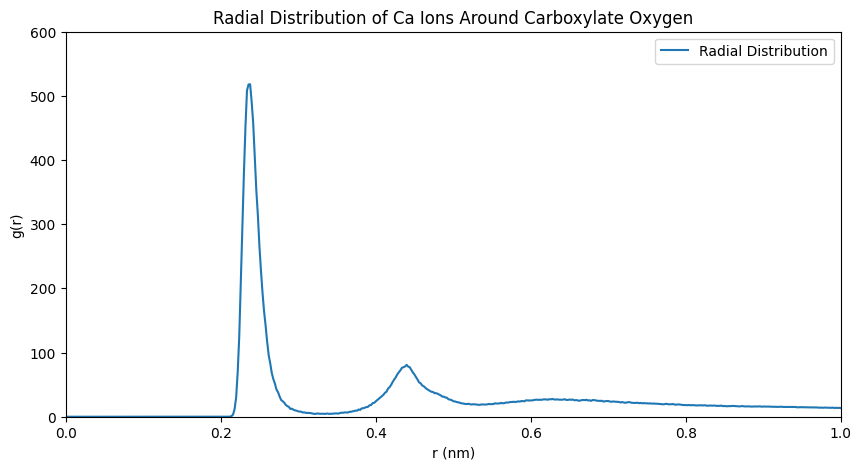

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Replace with the correct file path
filename = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/Gr_OxCarb-Ca_PAAcoAlc.xvg'

# Reading the data, skipping lines that start with '#' and '@'
data = np.loadtxt(filename, comments=['#', '@'])

# Extracting columns
r = data[:, 0]  # Column 1
gr = data[:, 1]  # Column 2

# Plotting Column 1 vs Column 2
plt.figure(figsize=(10, 5))
#plt.scatter(time, col2, label='Time vs End-End Distance')
plt.plot(r, gr, label='Radial Distribution')
plt.xlabel('r (nm)')
plt.ylabel('g(r)')
plt.xlim((0,1))
plt.ylim((0,600))
plt.title('Radial Distribution of Ca Ions Around Carboxylate Oxygen')
plt.legend()
plt.show()

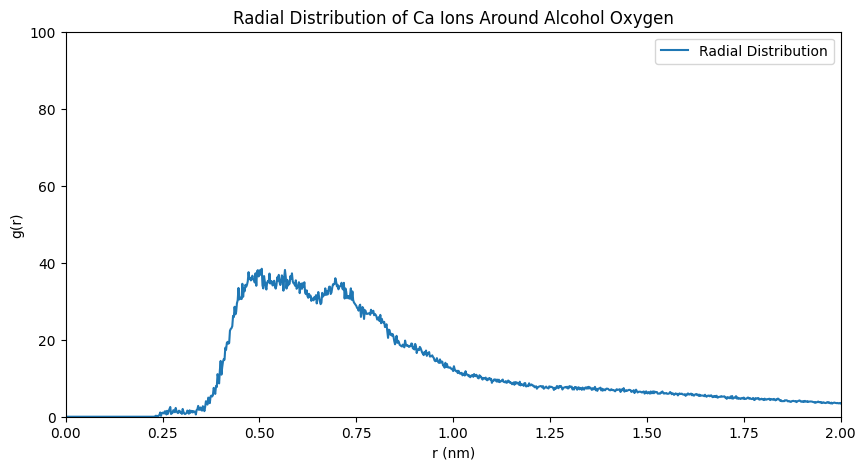

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Replace with the correct file path
filename = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/Gr_OxAlc-Ca_PAAcoAlc.xvg'

# Reading the data, skipping lines that start with '#' and '@'
data = np.loadtxt(filename, comments=['#', '@'])

# Extracting columns
r = data[:, 0]  # Column 1
gr = data[:, 1]  # Column 2

# Plotting Column 1 vs Column 2
plt.figure(figsize=(10, 5))
#plt.scatter(time, col2, label='Time vs End-End Distance')
plt.plot(r, gr, label='Radial Distribution')
plt.xlabel('r (nm)')
plt.ylabel('g(r)')
plt.xlim((0,2))
plt.ylim((0,100))
plt.title('Radial Distribution of Ca Ions Around Alcohol Oxygen')
plt.legend()
plt.show()

###Binding environment around a Ca<sup>2+</sup>

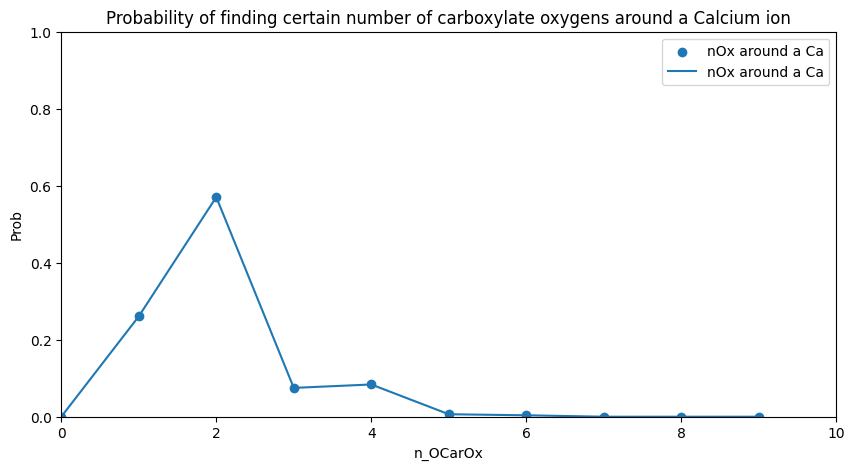

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Replace with the correct file path
filename = '/content/drive/My Drive/Colab Notebooks/Colab_AntiSclMolModel_Tutorial/Prob_NumCarbOxArdCa_PAAcoValIn32CaCl2.dat'

# Reading the data, skipping lines that start with '#' and '@'
data = np.loadtxt(filename, comments=['#', '@'])

# Extracting columns
nOx = data[:, 0]  # Column 1
Prob = data[:, 1]  # Column 2

# Plotting Column 1 vs Column 2
plt.figure(figsize=(10, 5))
#plt.scatter(time, col2, label='Time vs End-End Distance')
plt.scatter(nOx, Prob, label='nOx around a Ca')
plt.plot(nOx, Prob, label='nOx around a Ca')
plt.xlabel('n_OCarOx')
plt.ylabel('Prob')
plt.xlim((0,10))
plt.ylim((0,1))
plt.title('Probability of finding certain number of carboxylate oxygens around a Calcium ion')
plt.legend()
plt.show()